In [3]:
from random import shuffle
import glob,h5py, cv2, scipy, pickle, itertools, re
import numpy as np
from IPython.display import clear_output
from pandas import read_csv
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from collections import Counter
from tqdm import tqdm
subj = 'mti_mask'
filename = 'Datasets/'+'revision_'+subj+'_imit.pkl' # no resize
print('File to be created: ' + filename)

File to be created: Datasets/revision_mti_mask_imit.pkl


In [2]:
subjects = ['10 dec emre mahbub', '12 jan emre', '11 jan mahbub emre ladi', '12 jan ozgur mahbub ladi emre', 
            '13 jan ridvan ademola sean akthar emre', '14 jan ashwanth zeki', '15 apr ozgur',
           '15 jan emin', '19 apr sean', '19 apr sevgi', '21 apr emin', '22 apr ladi', '22 apr sean',
           '23 apr alperen', '23 apr mahbub', '5 apr sevgi']
mainpath = '/mnt/HDD01/rspl-admin/DATASETS/Fall Sequential/Outputs/'
label_files = []
for i in range(len(subjects)):
    addr = glob.glob(mainpath+subjects[i]+'/labels/microDoppler/'+'*.txt')
    label_files.append(addr)
label_files = sum(label_files, [])
print('Num. of label files: '+str(len(label_files)))
for i in range(0,5):    
    print(str(i+1)+'. '+label_files[i])

Num. of label files: 1322
1. /mnt/HDD01/rspl-admin/DATASETS/Fall Sequential/Outputs/10 dec emre mahbub/labels/microDoppler/11010014_1607634322_2.txt
2. /mnt/HDD01/rspl-admin/DATASETS/Fall Sequential/Outputs/10 dec emre mahbub/labels/microDoppler/11010014_1607632426_1.txt
3. /mnt/HDD01/rspl-admin/DATASETS/Fall Sequential/Outputs/10 dec emre mahbub/labels/microDoppler/11050014_1607634027_5.txt
4. /mnt/HDD01/rspl-admin/DATASETS/Fall Sequential/Outputs/10 dec emre mahbub/labels/microDoppler/11020000_1607632865_4.txt
5. /mnt/HDD01/rspl-admin/DATASETS/Fall Sequential/Outputs/10 dec emre mahbub/labels/microDoppler/11050014_1607635095_4.txt


In [6]:
# load videos
im_files = []
for i in range(len(label_files)):
    addr = label_files[i].replace('labels/','').replace('.txt','gray.png').replace('microDoppler','microDoppler-mti')
    im_files.append(addr)
# RD_files = sum(RD_files, [])
print('Num. of label files: '+str(len(im_files)))
for i in range(0,5):    
    print(str(i+1)+'. '+im_files[i])

Num. of label files: 1322
1. /mnt/HDD01/rspl-admin/DATASETS/Fall Sequential/Outputs/10 dec emre mahbub/microDoppler-mti/11010014_1607634322_2gray.png
2. /mnt/HDD01/rspl-admin/DATASETS/Fall Sequential/Outputs/10 dec emre mahbub/microDoppler-mti/11010014_1607632426_1gray.png
3. /mnt/HDD01/rspl-admin/DATASETS/Fall Sequential/Outputs/10 dec emre mahbub/microDoppler-mti/11050014_1607634027_5gray.png
4. /mnt/HDD01/rspl-admin/DATASETS/Fall Sequential/Outputs/10 dec emre mahbub/microDoppler-mti/11020000_1607632865_4gray.png
5. /mnt/HDD01/rspl-admin/DATASETS/Fall Sequential/Outputs/10 dec emre mahbub/microDoppler-mti/11050014_1607635095_4gray.png


In [8]:
train_spec, test_spec = train_test_split(im_files, test_size=0.2, random_state=1)

In [9]:
img = cv2.imread(train_spec[0])
img.shape

(811, 1482, 3)

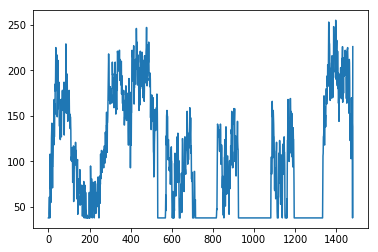

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
maxes = np.amax(img[:,:,0],0)
plt.plot(maxes)

In [18]:
cnt = 1
train_mask = []

for image in train_spec:
    img = cv2.imread(image)
    train_mask.append(np.amax(img[:,:,0],0))
    clear_output(wait=True)
    print('Loading training image '+str(cnt)+'/'+str(len(train_spec))+ ' '+image)
    cnt += 1
train_mask = np.array(train_mask)

cnt = 1
test_mask = []

for image in test_spec:
    img = cv2.imread(image)
    test_mask.append(np.amax(img[:,:,0],0))
    clear_output(wait=True)
    print('Loading training image '+str(cnt)+'/'+str(len(test_spec))+ ' '+image)
    cnt += 1
test_mask = np.array(test_mask)

print(train_mask.shape)
print(test_mask.shape)

Loading training image 265/265 /mnt/HDD01/rspl-admin/DATASETS/Fall Sequential/Outputs/19 apr sevgi/microDoppler-mti/11050001_1618852432_4gray.png
(1057, 1482)
(265, 1482)


In [20]:
data = [train_mask[0:800], test_mask[0:200]]
with open(filename, 'wb') as output:  # Overwrites any existing file.
        pickle.dump(data, output, pickle.HIGHEST_PROTOCOL)
print(filename+' created.')

Datasets/revision_mti_mask_imit.pkl created.
